# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import today's date in mm/dd/yyyy format
today = date.today()
today = today.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=105260ea8fd02c13bcdc1e7b381de81b"
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maldonado
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 3 of Set 1 | grindavik
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
City not found. Skipping...
Processing Record 7 of Set 1 | albany
City not found. Skipping...
Processing Record 8 of Set 1 | torbay
City not found. Skipping...
Processing Record 9 of Set 1 | nanortalik
City not found. Skipping...
Processing Record 10 of Set 1 | jepara
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
City not found. Skipping...
Processing Record 12 of Set 1 | petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 13 of Set 1 | kudahuvadhoo
City not found. Skipping...
Processing Record 14 of Set 

Processing Record 17 of Set 4 | potchefstroom
Processing Record 18 of Set 4 | saskylakh
Processing Record 19 of Set 4 | akyab
Processing Record 20 of Set 4 | kodiak
Processing Record 21 of Set 4 | nome
Processing Record 22 of Set 4 | hope
Processing Record 23 of Set 4 | attawapiskat
Processing Record 24 of Set 4 | liverpool
Processing Record 25 of Set 4 | ocos
Processing Record 26 of Set 4 | manali
Processing Record 27 of Set 4 | upernavik
Processing Record 28 of Set 4 | leh
Processing Record 29 of Set 4 | angoram
Processing Record 30 of Set 4 | santa rosa
Processing Record 31 of Set 4 | igarka
Processing Record 32 of Set 4 | lata
Processing Record 33 of Set 4 | hambantota
Processing Record 34 of Set 4 | guaruja
Processing Record 35 of Set 4 | hofn
Processing Record 36 of Set 4 | nguiu
Processing Record 37 of Set 4 | bubaque
Processing Record 38 of Set 4 | trinidad
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | vila do 

Processing Record 21 of Set 8 | kibala
Processing Record 22 of Set 8 | shumskiy
Processing Record 23 of Set 8 | ust-uda
Processing Record 24 of Set 8 | uusikaupunki
Processing Record 25 of Set 8 | yerbogachen
Processing Record 26 of Set 8 | achinsk
Processing Record 27 of Set 8 | saint-augustin
Processing Record 28 of Set 8 | rawson
Processing Record 29 of Set 8 | cidreira
Processing Record 30 of Set 8 | ambovombe
Processing Record 31 of Set 8 | tarudant
Processing Record 32 of Set 8 | vardo
Processing Record 33 of Set 8 | vila
Processing Record 34 of Set 8 | sumbawa
Processing Record 35 of Set 8 | pangoa
Processing Record 36 of Set 8 | sebring
Processing Record 37 of Set 8 | beloha
Processing Record 38 of Set 8 | didao
Processing Record 39 of Set 8 | tivaouane
Processing Record 40 of Set 8 | basco
Processing Record 41 of Set 8 | newberry
Processing Record 42 of Set 8 | ulladulla
Processing Record 43 of Set 8 | morgan city
Processing Record 44 of Set 8 | puerto princesa
Processing Reco

Processing Record 22 of Set 12 | vigrestad
Processing Record 23 of Set 12 | kroya
Processing Record 24 of Set 12 | visby
Processing Record 25 of Set 12 | okha
Processing Record 26 of Set 12 | abha
Processing Record 27 of Set 12 | burgeo
Processing Record 28 of Set 12 | jinchang
Processing Record 29 of Set 12 | fethiye
Processing Record 30 of Set 12 | chara
Processing Record 31 of Set 12 | kruisfontein
Processing Record 32 of Set 12 | alyangula
Processing Record 33 of Set 12 | sabak
Processing Record 34 of Set 12 | hare bay
Processing Record 35 of Set 12 | nuuk
Processing Record 36 of Set 12 | touros
Processing Record 37 of Set 12 | la palma
Processing Record 38 of Set 12 | boston
Processing Record 39 of Set 12 | pasni
Processing Record 40 of Set 12 | tefe
Processing Record 41 of Set 12 | trelew
Processing Record 42 of Set 12 | lasa
Processing Record 43 of Set 12 | panji
Processing Record 44 of Set 12 | abeche
Processing Record 45 of Set 12 | aykhal
Processing Record 46 of Set 12 | vest

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [26]:
city_data_pd.head(300)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
1,cape town,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
2,dehloran,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
3,dien bien,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
4,zemio,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
...,...,...,...,...,...,...,...,...,...
295,ravar,49.1168,-68.3990,23.0,54,1,9.22,CA,1610305100
296,karla,49.1168,-68.3990,23.0,54,1,9.22,CA,1610305100
297,belyy yar,49.1168,-68.3990,23.0,54,1,9.22,CA,1610305100
298,yarada,49.1168,-68.3990,23.0,54,1,9.22,CA,1610305100


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,11.248419,3.335957,54.489613,72.454225,60.827465,8.248873,1.610305e+09
std,40.038017,81.168622,22.703056,12.653349,35.290707,5.404898,8.031902e+00
min,-45.575200,-81.700600,23.000000,53.000000,1.000000,1.010000,1.610305e+09
25%,-32.035000,-72.066200,32.760000,61.000000,20.000000,2.040000,1.610305e+09
50%,12.584700,15.640100,48.200000,77.000000,75.000000,8.050000,1.610305e+09
75%,45.043000,33.954100,80.170000,83.000000,98.000000,11.500000,1.610305e+09
max,78.218600,155.633300,93.200000,89.000000,100.000000,23.020000,1.610305e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
dirty_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_data = city_data_pd.drop(dirty_data,inplace=False)
clean_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
1,cape town,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
2,dehloran,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
3,dien bien,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087
4,zemio,-45.5752,-72.0662,48.2,61,75,8.05,CL,1610305087


In [9]:
#Extract
lats = clean_data["Lat"]
max_temp = clean_data["Max Temp"]
humidity = clean_data["Humidity"]
cloudiness = clean_data["Cloudiness"]
wind_speed = clean_data["Wind Speed"]
clean_data.to_csv(output_data_file, index_label = "City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

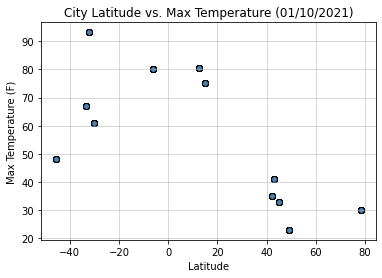

In [10]:
#Create plot
plt.scatter(lats, max_temp, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Max Temp.png")
plt.show()

## Latitude vs. Humidity Plot

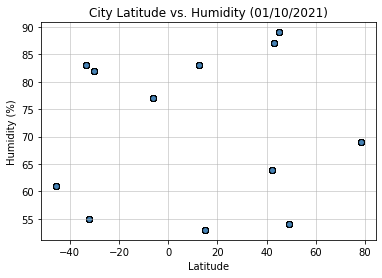

In [11]:
#Create plot
plt.scatter(lats, humidity, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Humidity.png")

## Latitude vs. Cloudiness Plot

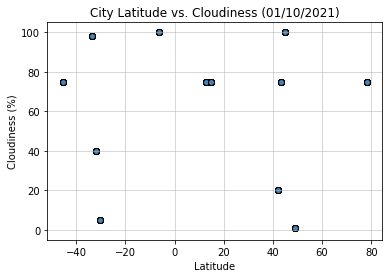

In [12]:
#Create plot
plt.scatter(lats, cloudiness, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

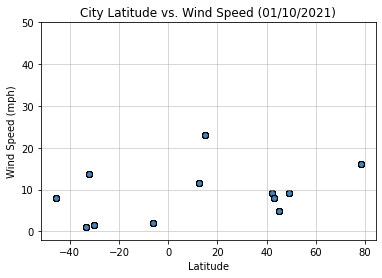

In [13]:
#Create plot
plt.scatter(lats,wind_speed, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,50)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Wind Speed.png")

## Linear Regression

In [14]:
#Create northern and southern hemisphere dataframes
northern_hemisphere = clean_data[clean_data["Lat"] >= 0]
southern_hemisphere = clean_data[clean_data["Lat"] < 0]

#Define functions for linear regression and scatter plot
def linear_regression(x,y,title,text_coordinates):
    print(f"The r-squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue ** 2}")
    print(f"The line equation is: {line_eq}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.82
The r-value is: 0.6723266132860124
The line equation is: y = -0.82x = 78.13


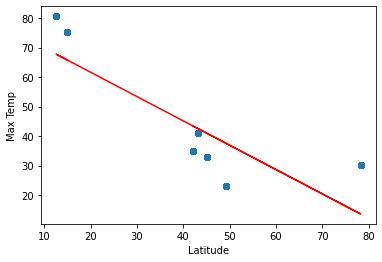

In [15]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Max Temp"]
linear_regression(x,y,'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Max Temp"]
linear_regression[x,y,'Max Temp',(6,30)]

TypeError: 'function' object is not subscriptable

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Humidity"]
linear_regression[x,y,'Humdity',(6,30)]

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Humidity"]
linear_regression[x,y,'Humidity',(6,30)]

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Cloudiness"]
linear_regression[x,y,'Cloudiness',(6,30)]

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Cloudiness"]
linear_regression[x,y,'Cloudiness',(6,30)]

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Wind Speed"]
linear_regression[x,y,'Wind Speed',(6,30)]

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Wind Speed"]
linear_regression[x,y,'Wind Speed',(6,30)]